# __*McLaren in the Hybrid Era*__
## __(2014 - Present)__

Hello!

We are going to explore McLaren's Formula 1 performance since the introduction of the hybrid engine in 2014.

The data we'll be taking a look at comes from a Formula 1 dataset fonund on Kaggle, which contains race data starting from 1950 and going up to the 2021 season's Austrian Grand Prix (July 4th, 2021).

__[Link to dataset](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020)__

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import display

In [2]:
# Read in the data - Here, we are assuming that the data is in the same directory
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
constructors = pd.read_csv('constructors.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')

In [3]:
# Displaying the top of each dataset we read in to verify that it looks correct

# Race result DataFrame
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# Races DataFrame
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [5]:
# Constructors DataFrame
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [6]:
# Constructor standings DataFrame
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [7]:
# Getting information on McLaren from the list of constructors
constructors[constructors['name'] == 'McLaren']

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


With the above, we now know that McLaren has a **constructorId** of **1**, which we can use to filter out data that is not related to the team.

Now, let's take a look at how the team ranks in the constructor standings from 2014-2021.

In [8]:
# Joining the constructor standings and list of races
mclaren_standings = constructor_standings.merge(races, on='raceId')
mclaren_standings = mclaren_standings[(mclaren_standings['constructorId'] == 1) & (mclaren_standings['year'] >= 2014)]

# Convert the date column to datetime type
mclaren_standings['date'] = pd.to_datetime(mclaren_standings['date'])

# Getting the last date each season (and the last race with results in the 2021 season)
# to get the constructor standings for each year
last_race_each_season = mclaren_standings[['year', 'raceId', 'date']][mclaren_standings['date'] <= '2021-07-04']
last_race_each_season = last_race_each_season.groupby(['year']).max().reset_index()

mclaren_standings = mclaren_standings.merge(last_race_each_season, on='raceId')[['year_x', 'raceId', 'points', 'position', 'wins', 'date_x']]
mclaren_standings.rename(columns={'year_x': 'year', 'date_x': 'date_of_last_race', 
                        'position': 'constructor_standing'}, inplace=True)
mclaren_standings[['year', 'constructor_standing']]

,year,constructor_standing
0,2014,5
1,2015,9
2,2016,6
3,2017,9
4,2018,6
5,2019,4
6,2020,3
7,2021,3


Starting in 2019, McLaren has improved their ranking in the constructor's championship compared to the previous years, and 2021 also looks to have a strong start with the team on track to match 2020's third place ranking.

In [9]:
# Filtering the results data to return times when McLaren has finished in first place
last_mclaren_win = results[(results['constructorId'] == 1) & (results['positionOrder'] == 1)]

# Joining the results and races tables on the raceId column and 
# returning the first row after sorting by raceId in descending order
last_mclaren_win = last_mclaren_win.merge(races, on='raceId')[['raceId', 'year', 'name', 'positionOrder']].sort_values(by='raceId', ascending=False).head(1)
last_mclaren_win

,raceId,year,name,positionOrder
177,879,2012,Brazilian Grand Prix,1


We can see that, within the range of the dataset, McLaren has not won a race since the 2012 Brazilian Grand Prix. This lies outside the range of time that we're focusing on, so instead of exploring McLaren's performance through race wins, we can try and see how many podiums the team has achieved starting from the 2014 season.

In [10]:
# Join the list of races with the results table to get all McLaren race results from 2014-Present
results_hybrid_era = races.merge(results, on='raceId')
results_hybrid_era = results_hybrid_era[(results_hybrid_era["year"] >= 2014) & (results_hybrid_era["constructorId"] == 1)]

# Dropping columns not being used
results_hybrid_era.drop(columns={'circuitId', 'date', 'time_x', 'url', 'position', 
                        'positionText', 'time_y', 'milliseconds', 'fastestLap', 'fastestLapTime',
                        'fastestLapSpeed'}, inplace=True)

results_hybrid_era.head()

,raceId,year,round,name,resultId,driverId,constructorId,number,grid,positionOrder,points,laps,rank,statusId
22134,900,2014,1,Australian Grand Prix,22131,825,1,20,4,2,18.0,57,6,1
22135,900,2014,1,Australian Grand Prix,22132,18,1,22,10,3,15.0,57,5,1
22160,901,2014,2,Malaysian Grand Prix,22157,18,1,22,10,6,8.0,56,11,1
22163,901,2014,2,Malaysian Grand Prix,22160,825,1,20,8,9,2.0,55,8,11
22193,902,2014,3,Bahrain Grand Prix,22190,18,1,22,6,17,0.0,55,10,8


,year,number_of_podiums
0,2014,2
1,2015,0
2,2016,0
3,2017,0
4,2018,0
5,2019,1
6,2020,2
7,2021,3


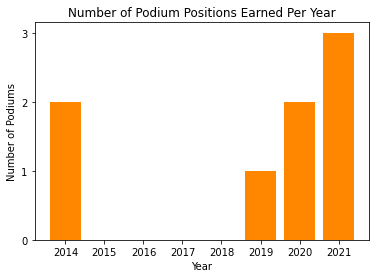

In [18]:
# Getting the number of podiums each year by getting the list of years and
# joining (using a left join) it with number of top 3 finishes. This allows 
# years without podium finishes to be included with zero as the number of podiums.
count_podiums = results_hybrid_era[results_hybrid_era['positionOrder'] <= 3].groupby('year')['positionOrder'].count().reset_index()
year_list = results_hybrid_era['year'].drop_duplicates().to_frame()
count_podiums = year_list.merge(count_podiums, how='left', on='year').fillna(0).astype(int)
count_podiums.rename(columns={'positionOrder': 'number_of_podiums'}, inplace=True)
display(count_podiums)

# Use a bar chart to display the number of podiums each year
plt.figure()
plt.bar(count_podiums['year'], count_podiums['number_of_podiums'], color='#FF8700')
plt.title('Number of Podium Positions Earned Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Podiums')
plt.ylim(1, None)
plt.yticks(range(0, count_podiums['number_of_podiums'].max() + 1))
plt.show()

After 2014, the team failed to finish in the top 3 positions for four years until 2019, and the current season seems to be their strongest yet in terms of finishing races closer to the front.

Even though the 2021 season is not complete, McLaren has already achieved the more podiums than any other year within this period.

In [12]:
# Calculating the average of the team's finishing positions
# and average points scored
average_race_results = results_hybrid_era.groupby('year')['positionOrder'].mean().reset_index()
average_points_scored = results_hybrid_era.groupby('year')['points'].mean().reset_index()

average_race_results = average_race_results.merge(average_points_scored, on='year')

# Rename columns to reflect the calculated values
average_race_results.rename(columns={'positionOrder': 'average_position', 
                'points': 'average_points_scored'}, inplace=True)

# Round the averages to the nearest tenth
average_race_results = average_race_results.round(1)

average_race_results

,year,average_position,average_points_scored
0,2014,8.9,4.8
1,2015,14.5,0.7
2,2016,12.7,1.8
3,2017,13.8,0.8
4,2018,12.8,1.5
5,2019,10.7,3.5
6,2020,8.6,5.9
7,2021,6.4,7.8


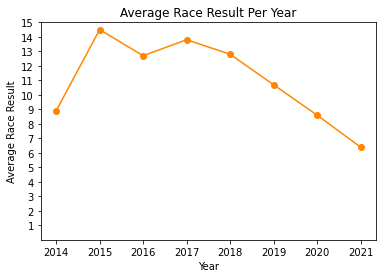

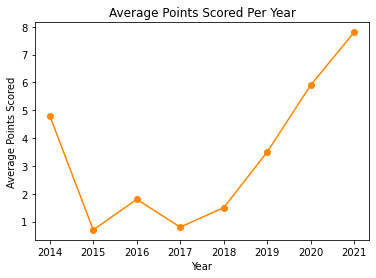

In [17]:
# Plot the average finishing position for the team each year
plt.figure()
plt.plot(average_race_results['year'], average_race_results['average_position'], 'o-', color='#FF8700')
plt.title('Average Race Result Per Year')
plt.xlabel('Year')
plt.ylabel('Average Race Result')
plt.ylim(0, None)
plt.yticks(range(1, (math.ceil(average_race_results['average_position'].max()) + 1)))
plt.show()

# Plot the average points scored (per race) for the team each year
plt.figure()
plt.plot(average_race_results['year'], average_race_results['average_points_scored'], 'o-', color='#FF8700')
plt.title('Average Points Scored Per Year')
plt.xlabel('Year')
plt.ylabel('Average Points Scored')
plt.show()

After a sharp decline in 2015, there are significant improvements in the average amount of points scored per race starting in 2019. Starting in 2020, the average race result that the drivers are finishing in lands within the top 10, which indicates that the team is scoring points more consistently.

In [14]:
results_all_teams = races.merge(results, on='raceId')
results_all_teams = results_all_teams[results_all_teams['year'] >= 2014]
results_all_teams.head()

,raceId,year,round,circuitId,name,date,time_x,url,resultId,driverId,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
22133,900,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,https://en.wikipedia.org/wiki/2014_Australian_...,22130,3,...,1,25.0,57,1:32:58.710,5578710,19,1,1:32.478,206.436,1
22134,900,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,https://en.wikipedia.org/wiki/2014_Australian_...,22131,825,...,2,18.0,57,+26.777,5605487,49,6,1:33.066,205.131,1
22135,900,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,https://en.wikipedia.org/wiki/2014_Australian_...,22132,18,...,3,15.0,57,+30.027,5608737,39,5,1:32.917,205.460,1
22136,900,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,https://en.wikipedia.org/wiki/2014_Australian_...,22133,4,...,4,12.0,57,+35.284,5613994,57,7,1:33.186,204.867,1
22137,900,2014,1,1,Australian Grand Prix,2014-03-16,06:00:00,https://en.wikipedia.org/wiki/2014_Australian_...,22134,822,...,5,10.0,57,+47.639,5626349,56,3,1:32.616,206.128,1


22


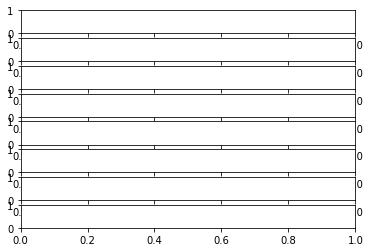

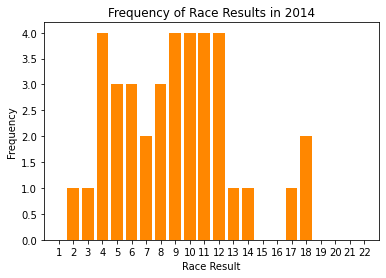

20


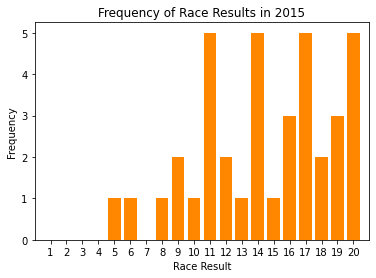

22


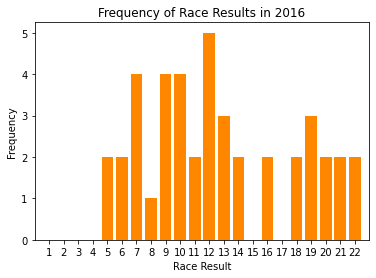

20


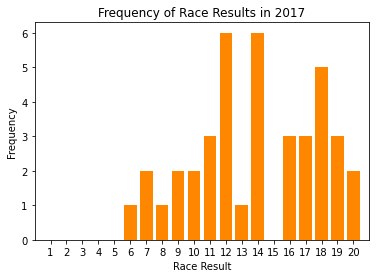

20


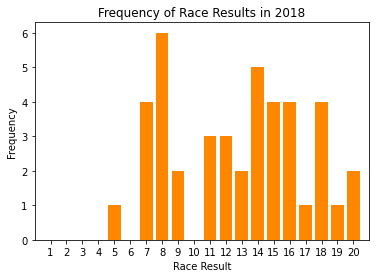

20


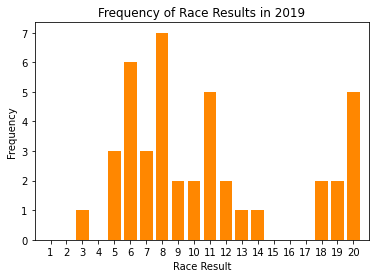

20


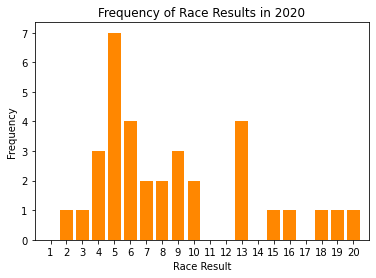

20


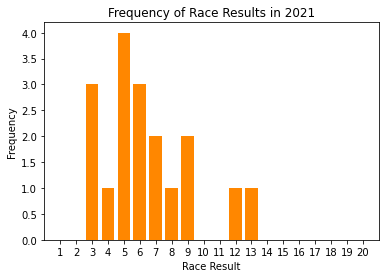

In [19]:
# Getting the number of drivers that participated by getting the
# highest position number that a driver placed in each year.
number_of_drivers = results_all_teams.groupby('year')['positionOrder'].max().reset_index()


fig, axs = plt.subplots(8)

# Frequency of race results from 2014 - 2021
for i in range(2014, 2022):
    plt.figure()
    df = results_hybrid_era[results_hybrid_era['year'] == i].groupby('positionOrder')['raceId'].count().reset_index()
    df.rename(columns={'positionOrder': 'race_result', 
                'raceId': 'frequency'}, inplace=True)
    
    driver_count_this_year = number_of_drivers[number_of_drivers['year'] == i]['positionOrder'].item()
    #print(driver_count_this_year)

    plt.bar(df['race_result'], df['frequency'], color='#FF8700')
    #plt.hist(results_hybrid_era[results_hybrid_era['year'] == i]['positionOrder'], color='#FF8700')
    plt.xlabel('Race Result')
    plt.ylabel('Frequency')

    plt.xlim(0, driver_count_this_year + 1)
    plt.xticks(range(1, driver_count_this_year + 1))
    plt.title('Frequency of Race Results in %d' % i)
    plt.show()
    i += 1


In [16]:
df = results_hybrid_era[results_hybrid_era['year'] == 2021].groupby('positionOrder')['raceId'].count().reset_index()

results_all_teams = races.merge(results, on='raceId')
results_all_teams = results_all_teams[results_all_teams['year'] >= 2014]
test = results_all_teams.groupby('year')['positionOrder'].max().reset_index()
test[test['year'] == 2014]['positionOrder']
#results_hybrid_era[results_hybrid_era['year'] == i]['positionOrder']
#df
#df['raceId']
#df['raceId'].max()
#df['positionOrder']

#fig = plt.figure()
#plt.bar(df['positionOrder'], df['raceId'], color='#FF8700')
#xlim = range(1, 21)
#ylim = range(1, 6)
#plt.xlim(1, 21)
#plt.ylim(0, 6)
#plt.xticks(xlim)
#plt.yticks(ylim)
#plt.show()

#results_hybrid_era.groupby('positionOrder')[results_hybrid_era['year'] == 2014].count().reset_index()

0    22
Name: positionOrder, dtype: int64

POTENTIAL IDEAS TO IMPLEMENT: Average lap times, web scraping to get rest of race results, total points for each race to see consistency throughout the season, average race result on recurring tracks